In [1]:
import sys,os
sys.path.append('../src/tabulairity/')

import pandas as pd
import numpy as np
import osmnx as ox
import geopandas as gpd
import tabulairity as tb

import json
import ast

from dateutil import parser
from time import sleep
from shapely.geometry import Point

%matplotlib inline

In [2]:
tb.modelName

'gpt-4o-mini'

# Test Case 2: WHO Disease Outbreak News
* Scrapes DON reports
* Extracts data to standardized format

In [3]:
def extractDON(html):
    soup = BeautifulSoup(html)
    title = soup.find(class_='don-title').text.strip()
    extracted = {'title':title}

    donSectionHeadings = soup.find_all('h3', class_='don-section')
    for h3Heading in donSectionHeadings:
        donContentDiv = h3Heading.find_next('div',class_='don-content')
        if donContentDiv:
            content = donContentDiv.text.strip()
            extracted[h3Heading.text.strip()] = content
    return extracted


In [4]:
reportRange2022 = [f'2022-DON{report}' for report in range(390,433)]
reportRange2023 = [f'2023-DON{report}' for report in range(432,497)]
unsorted = ['2022-DON435']
reportRange = sorted(list(set(reportRange2022 + reportRange2023 + unsorted)))
urlPrefix = 'https://www.who.int/emergencies/disease-outbreak-news/item/'
urls = [f'{urlPrefix}{report}' for report in reportRange]

In [5]:
donTableRef = 'input/DONPages.csv'

if not os.path.exists(donTableRef):
    pages = dict()
    for url in urls:
        try:
            html = tb.cachePage(url)
            pages[url.split('/')[-1]] = extractDON(html)
        except:
            print(f"Failed for page: {url}")
        
    DONPages = pd.DataFrame(pages).T
    DONPages.loc[:,'URL'] = urlPrefix + DONPages.index
    DONPages.to_csv(donTableRef)
else:
    DONPages = pd.read_csv(donTableRef,index_col=0)

In [6]:
DONPages

,title,Description of the Situation,Public Health Response,WHO Risk Assessment,WHO Advice,Further Information,Situation at a Glance,Epidemiology,URL
2022-DON390,Multi-country monkeypox outbreak: situation up...,The current publication of Disease Outbreak Ne...,WHO continues to support sharing of informatio...,"Currently, the public health risk at the globa...",The advice provided hereafter by the WHO on ac...,WHO Guidance and Public Health Recommendations...,NaN,NaN,https://www.who.int/emergencies/disease-outbre...
2022-DON391,Cholera - Pakistan,"Outbreak at a glanceIn Pakistan, cholera is en...","In response to the outbreak, the provincial he...",The risk of potential international spread fro...,WHO recommends strengthening of the disease su...,Cholera fact sheet Weekly Epidemiological Reco...,NaN,NaN,https://www.who.int/emergencies/disease-outbre...
2022-DON392,Multi-country monkeypox outbreak: situation up...,This current Disease Outbreak News on the mult...,WHO continues to support sharing of informatio...,"Currently, the public health risk at the globa...",The advice provided hereafter by the WHO on ac...,"For more information on monkeypox, please see:...",NaN,NaN,https://www.who.int/emergencies/disease-outbre...
2022-DON393,Multi-country monkeypox outbreak: situation up...,This current Disease Outbreak News on the mult...,WHO continues to support sharing of informatio...,"Currently, the public health risk at the globa...",The advice provided hereafter by the WHO on ac...,WHO Guidance and Public Health Recommendations...,NaN,NaN,https://www.who.int/emergencies/disease-outbre...
2022-DON394,Severe acute hepatitis of unknown aetiology in...,"Outbreak at a glance As of 22 June 2022, 33 co...","Epidemiological, clinical, laboratory, histopa...",The risk at the global level is currently asse...,Laboratory testing WHO has developed interim g...,Joint ECDC-WHO Regional Office for Europe Hepa...,NaN,NaN,https://www.who.int/emergencies/disease-outbre...
...,...,...,...,...,...,...,...,...,...
2023-DON492,Diphtheria - Guinea,"On 5 September 2023, the Ministry of Health no...",Guinea has strengthened epidemiological survei...,Diphtheria is a vaccine-preventable disease ca...,The control of diphtheria is based on primary ...,WHO diphtheria page: https://www.who.int/teams...,"On 5 September 2023, the Ministry of Health no...",Diphtheria is a highly contagious vaccine-prev...,https://www.who.int/emergencies/disease-outbre...
2023-DON493,Mpox (monkeypox)- Democratic Republic of the C...,"From 1 January through 12 November 2023, a tot...",Emergency coordination: The Ministry of Public...,"From 1 January to 12 November 2023, there has ...","All countries, including their health authorit...",WHO interim technical guidance:https://www.who...,Mpox is an infectious disease caused by monkey...,Mpox (monkeypox) is an infectious disease caus...,https://www.who.int/emergencies/disease-outbre...
2023-DON494,Upsurge of respiratory illnesses among childre...,"Since mid-October 2023, the World Health Organ...","Since mid-October, in addition to enhancing di...",In the current outbreak of respiratory illness...,"Based on the available information, WHO recomm...",ProMed article. Undiagnosed pneumonia – China:...,NaN,NaN,https://www.who.int/emergencies/disease-outbre...
2023-DON495,Avian Influenza A (H5N1) - Cambodia,The Ministry of Health of Cambodia notified WH...,The Ministry of Health's national and sub-nati...,"From 2003 to 27 November 2023, a total of 882 ...",This event does not change the current WHO rec...,MOH Cambodia press release on official Faceboo...,"Between 24 and 25 November 2023, the Ministry ...",Animal influenza viruses normally circulate in...,https://www.who.int/emergencies/disease-outbre...


In [7]:
chatFx = {'isYes':lambda x,y:tb.ynToBool(x),
          'isNo':lambda x,y:not tb.ynToBool(x),
          'getYN':lambda x,y:tb.getYN(x),
          'parseDate':lambda x,y: parser.parse(x),
          'geocodeOne':lambda x,y: tb.cacheGeocode(x),
          'geocodeMany':lambda x,y: [tb.cacheGeocode(i.strip()) for i in x.split(',')],
          'castInt':lambda x,y: int(x),
          'loadJson':lambda x,y: json.loads(x),
          'standardizeList':lambda x,y: x.replace('*','-')}


2022-DON390
2022-DON391
2022-DON392
2022-DON393
2022-DON394
2022-DON395
2022-DON396
2022-DON398
2022-DON400
2022-DON401


,2022-DON390,2022-DON391,2022-DON392,2022-DON393,2022-DON394,2022-DON395,2022-DON396,2022-DON398,2022-DON400,2022-DON401
title,Multi-country monkeypox outbreak: situation up...,Cholera - Pakistan,Multi-country monkeypox outbreak: situation up...,Multi-country monkeypox outbreak: situation up...,Severe acute hepatitis of unknown aetiology in...,Wild poliovirus type 1 (WPV1) - Mozambique,Multi-country monkeypox outbreak: situation up...,Ebola virus disease - Democratic Republic of t...,Severe acute hepatitis of unknown aetiology in...,Dengue in Rohingya refugee/Forcibly Displaced ...
Single Pathogen,Monkeypox,Cholera,Monkeypox,Monkeypox,NaN,NaN,Monkeypox,Ebola virus disease (EVD),NaN,NaN
Multiple Pathogens,NaN,NaN,NaN,NaN,"```python\npathogens = [""Adenovirus"", ""SARS-Co...","```python\npathogens = [""Wild Poliovirus Type ...",NaN,NaN,"```python\npathogens = [""adenovirus"", ""SARS-Co...","```python\npathogens = [""Dengue Virus (DENV-1)..."
Reporting Date,05-13-2022,04-26-2022,05-13-2022,05-15-2022,04-05-2022,05-15-2022,06-22-2022,04-23-2022,04-05-2022,05-23-2022
Reporting Agency,WHO,National IHR Focal Point of Pakistan,WHO,WHO,WHO,Global Polio Laboratory Network (GPLN),WHO,Ministry of Health (MoH) of the Democratic Rep...,WHO,World Health Organization (WHO)
Index Date,05-13-2022,NaN,NaN,NaN,04-05-2022,03-25-2022,NaN,04-21-2022,04-05-2022,05-23-2022
Case Count,523,290,505,2103,270,1,1310,5,90,7178
Death Count,0,9,72,1,18,0,1,5,4,6
Check Pathogen,yes,yes,yes,yes,no,no,yes,yes,no,no
Location,"Europe, North America, Nigeria, Cameroon, Cent...","Sindh, Balochistan, Punjab, Karachi","Americas, Europe, Eastern Mediterranean, Weste...","Americas, Africa, Europe, Eastern Mediterranea...","United Kingdom, United States, Netherlands, Sc...","Mozambique, Malawi, Pakistan, Zimbabwe","Nigeria, European Region, African Region, Regi...","Mbandaka, Wangata, Equateur province",United Kingdom of Great Britain and Northern I...,"Cox's Bazar district, Ukhia Upazila, Teknaf Up..."


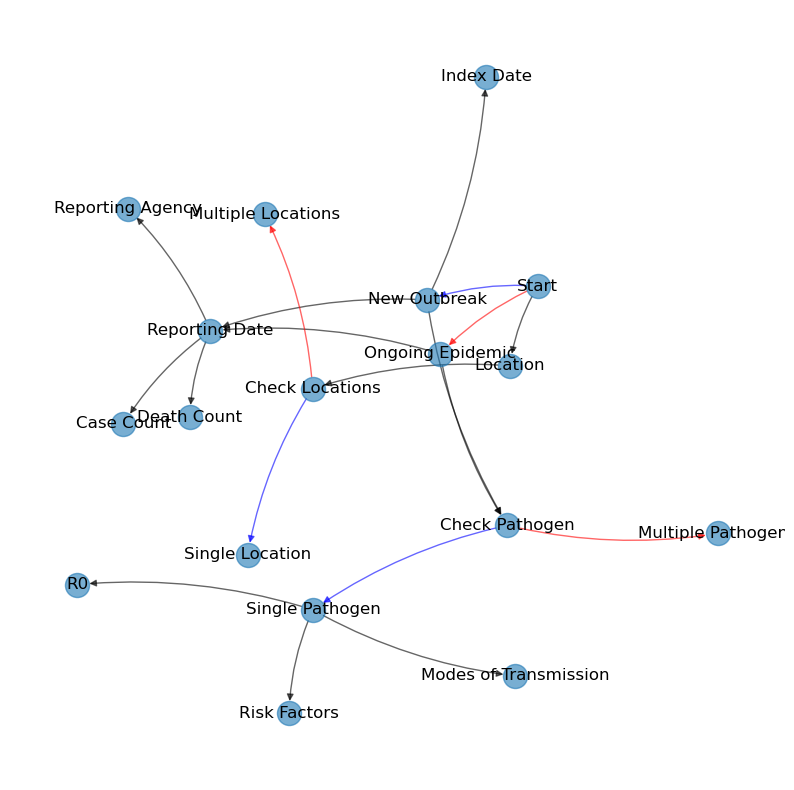

In [8]:
DONNet = pd.read_csv('networks/DONExtraction.csv')
chatGraph = tb.buildChatNet(DONNet,show=True)


results = dict()
for DON,textData in DONPages[:10].iterrows():
    print(DON)
    if True:
        result = tb.walkChatNet(chatGraph,
                             fxStore = chatFx,
                             varStore = textData,
                             verbosity = 0)
        #sleep(.5)
        results[DON] = result
    else:
        print("Failed for",DON)
    
temp = pd.DataFrame(results)
temp = temp[~temp.index.str.contains('prompt')]
temp = temp[~temp.index.str.contains('-')]

extracted = ['title',
             'Single Pathogen',
             'Multiple Pathogens',
             'Reporting Date',
             'Reporting Agency',
             'Index Date',
             'Case Count',
             'Death Count',
             'Check Pathogen',
             'Location',
             'Single Location',
             'Multiple Locations',
             'Risk Factors',
             'Modes of Transmission',
             'Start',
             'R0',
             'URL']
extracted = [i for i in extracted if i in temp.index]
prepped = temp.loc[extracted,:]
prepped

In [9]:
prepped.T.merge(DONPages).to_csv("output/DONValidationTable.csv",index=False)

In [10]:
prepped = temp.loc[extracted,:]
prepped.to_csv('output/DONScrape.csv')
prepped.to_pickle('output/DONScrape.pickle')

In [10]:
def cleanAgencies(column):
    agencyCleaners = {'Ministry of Health Uganda and WHO':'Ministry of Health Uganda',
                     'Ministry of Health and Family Welfare, Bangladesh':'Ministry of Health and Family Welfare of Bangladesh',
                     'Ministry of Health and WHO':'World Health Organization',
                     'Nigeria Centre for Disease Control':'Nigeria Centre for Disease Control and Prevention',
                     'WHO':'World Health Organization'}
    cleanWord = lambda x: x.split("’")[0].replace('&','and')
    dropParentheses = lambda x: ' '.join([cleanWord(i) for i in x.split() if not i.startswith('(')])
    column = column.apply(dropParentheses)
    column = column.replace(agencyCleaners)
    return column

def cleanDiseases(column):
    diseaseCleaners = {'and Lassa virus':'Lassa virus',
                       'Avian Influenza A(H5)':'Avian Influenza A(H5N1)',
                       'Avian influenza A (H5N1) virus':'Avian Influenza A(H5N1)',
                       'Avian influenza A(H5) virus':'Avian Influenza A(H5N1)',
                       'Circulating vaccine-derived poliovirus type 2 (cVDPV2)':'Circulating Vaccine-Derived Poliovirus Type 2 (cVDPV2)',
                       'Dengue':'Dengue fever',
                       'Dengue virus (DENV)':'Dengue fever',
                       'Ebola Sudan virus (SUDV)':'Sudan ebolavirus (SUDV)',
                       'Ebola Virus Disease (EVD)':'Ebola virus disease (EVD)',
                       'Echovirus 11 (E-11)': 'Enterovirus (Echovirus-11 (E-11))',
                       'Influenza A (H5N1)':'Avian Influenza A(H5N1)',
                       'Influenza A(H1N1)v virus':'Avian Influenza A(H5N1)',
                       'Influenza A(H1N2) variant virus':'Influenza A(H1N2)',
                       'Influenza A(H1N2)v virus':'Influenza A(H1N2)',
                       'Influenza A(H5N1)':'Avian Influenza A(H5N1)',
                       'Legionella pneumophila':"Legionnaires' disease",
                       'Marburg virus disease':'Marburg Virus Disease (MVD)',
                       'Marburg virus disease (MVD)':'Marburg Virus Disease (MVD)',
                       'Middle East Respiratory Syndrome Coronavirus (MERS-CoV)':'Middle East respiratory syndrome coronavirus (MERS-CoV)',
                       'Nipah virus infection':'Nipah virus',
                       'Severe acute hepatitis of unknown aetiology in children':'Acute hepatitis of unknown aetiology',
                       'Sudan ebolavirus':'Sudan ebolavirus (SUDV)',
                       'Ebola disease caused by Sudan virus (SUDV)':'Sudan ebolavirus (SUDV)'}
    column = column.replace(diseaseCleaners)
    return column
                            
def addCaseFatalityRate(df):
    df['Case Count'] = pd.to_numeric(df['Case Count'], errors='coerce')
    df['Death Count'] = pd.to_numeric(df['Death Count'], errors='coerce').fillna(0)
    df['Case Fatality Rate'] = df['Death Count'] / df['Case Count']


def remapCategoricals(df):
    df.rename({'Start':'Status',
               'Check Pathogen':'Class',
               'title':'Title'},axis=1,inplace=True)
    df.Status = df.Status.map({'yes':'Novel outbreak','no':'Existing epidemic'})
    df.Class = df.Class.map({'yes':'Epidemic','no':'Syndemic'})
   
    
def rankSeverity(df):
    roughR0 = []
    for rEst in df['R0']:
        if type(rEst) is list:
            roughR0.append(np.mean(rEst))
        else:
            roughR0.append(1.)
    df['Rough R0'] = roughR0
    df['Severity'] = 4 + (10 * df['Case Count'] * (1+20*df['Case Fatality Rate']) * df['Rough R0'] / df['Countries Affected']) ** .25
    df['R0'] = df['R0'].astype(str)

    
    
def standardizePathogens(df):
    pathogens = []
    for singPath, multPath in zip(df['Single Pathogen'],df['Multiple Pathogens']):
        if singPath == singPath:
            pathogens.append(singPath)
        elif multPath == multPath:
            multPath = multPath.split('[')[1].split(']')[0]
            multPath = ast.literal_eval(f'[{multPath}]')
            if len(multPath) == 1:
                pathogens.append(multPath[0])
            elif len(multPath) > 3:
                pathogens.append(', '.join(multPath[:3] + ['etc']))
            else:
                multPath[-1] = 'and ' + multPath[-1]
                pathogens.append((', ').join(multPath))
    df['Pathogen(s)'] = pathogens
    df = df.drop(['Single Pathogen','Multiple Pathogens'],axis=1)
    
    return df



def expandLocations(df):
    newRows = []
    multRowDf = df.dropna(subset=['Multiple Locations'])
    for index, row in multRowDf.iterrows():
        locNames = row['Location'].split(', ')
        locCoords = row['Multiple Locations']
        sublocCount = len(locNames)
        
        for locName, locCoord in zip(locNames,locCoords):
            newRow = {**row}
            newRow['Single Location'] = locCoord
            newRows.append(newRow)
            
    df = pd.concat([df,pd.DataFrame(newRows)])
    df = df.dropna(subset=['Single Location'])
    
    df['Latitude'] = df['Single Location'].str[0]
    df['Longitude'] = df['Single Location'].str[1]
    
    df = df.drop(['Multiple Locations','Single Location'],axis=1)


    return df
        
            
def mergeSublocations(df):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[['pop_est','name','geometry']]
    pointsDf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['Longitude'], df['Latitude'])).set_crs('EPSG:4326')
    merged = gpd.sjoin(pointsDf, world, how='left', predicate='within')
    merged = merged.drop(['index_right'],axis=1)
    merged = merged.rename({'pop_est':'Population',
                            'name':'Country'},
                           axis=1)
    
    merged = merged.dropna(subset=['Country'])
    merged = merged.groupby(['DON','Country']).last().reset_index()
    sublocCounts = merged.groupby(['DON']).Country.count().reset_index()
    sublocCounts.columns = ['DON','Countries Affected']
    merged = pd.merge(merged, sublocCounts, how='left')    
    
    return merged

        
            

def prepPlotDf(dfIn):
    df = dfIn.copy(deep=True).T
    df['DON'] = df.index
    
    df['Reporting Agency'] = cleanAgencies(df['Reporting Agency'])
    df['Single Pathogen'] = cleanDiseases(df['Single Pathogen'])
    
    df = standardizePathogens(df)
    df = expandLocations(df)
    df = mergeSublocations(df)
    
    remapCategoricals(df)
    addCaseFatalityRate(df)
    rankSeverity(df)
    
    df.Severity = df.Severity.fillna(df.Severity.median())
    
    df['Coord'] = df.Latitude.astype(str) + ',' + df.Longitude.astype(str)
    
    df['Summary'] = 'Country:\n' + df['Country'] + '\n\nEvent Type:\n' + df['Status']+' - '+df['Class'] + '\n\nNumber of Countries Affected:\n' + df['Countries Affected'].astype(str) + '\n\nReporting Agency:\n' + df['Reporting Agency'] + '\n\nModes of Transmission:\n' + df['Modes of Transmission'] + '\n\nRisk Factors:\n' + df['Risk Factors']
    
    return df

    
processed = prepPlotDf(prepped)

/var/folders/pk/jw21zwnj07z_f216pyxkfynw0000gn/T/ipykernel_5902/3337615268.py:115: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[['pop_est','name','geometry']]


NameError: name 'np' is not defined

In [ ]:
processed.drop(['geometry'],axis=1).to_csv('output/DONPrepped.csv',index=False)
processed.to_file('output/DONPrepped.geojson', driver='GeoJSON')

In [ ]:
print(processed.loc[0,'Summary'])

In [ ]:
processed.iloc[0]

In [ ]:
fig, ax = plt.subplots(figsize=(20,14))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[['pop_est','name','geometry']]
world.plot(ax=ax,
          zorder=1,
          alpha=.3)

processed.plot(ax=ax,
               zorder=2,
               column='Pathogen(s)',
               cmap='gist_ncar',
               markersize='Severity',
               legend=True,
               legend_kwds={'loc': 'lower right'})

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5, -.05, 0., 0.))

plt.title("Mapped DON Events by Country")